# Oriented FAST and Rotated BRIEF (ORB)

## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

In [2]:
img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## 3- ORB Detector

- detect

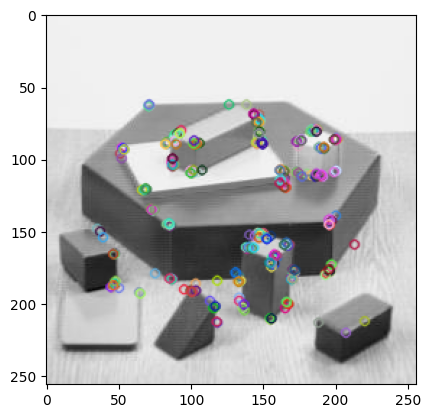

In [3]:
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

img=cv2.drawKeypoints(img,kp,img)

plt.imshow(img)
plt.show()

- detect and compute

(428, 32)


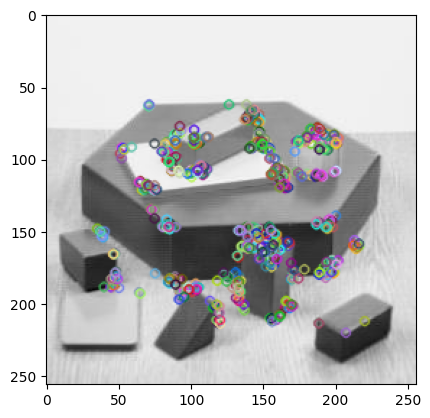

In [4]:
orb = cv2.ORB_create()

kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
print(des.shape)

img=cv2.drawKeypoints(img,kp,img)

plt.imshow(img)
plt.show()

## - Box Example

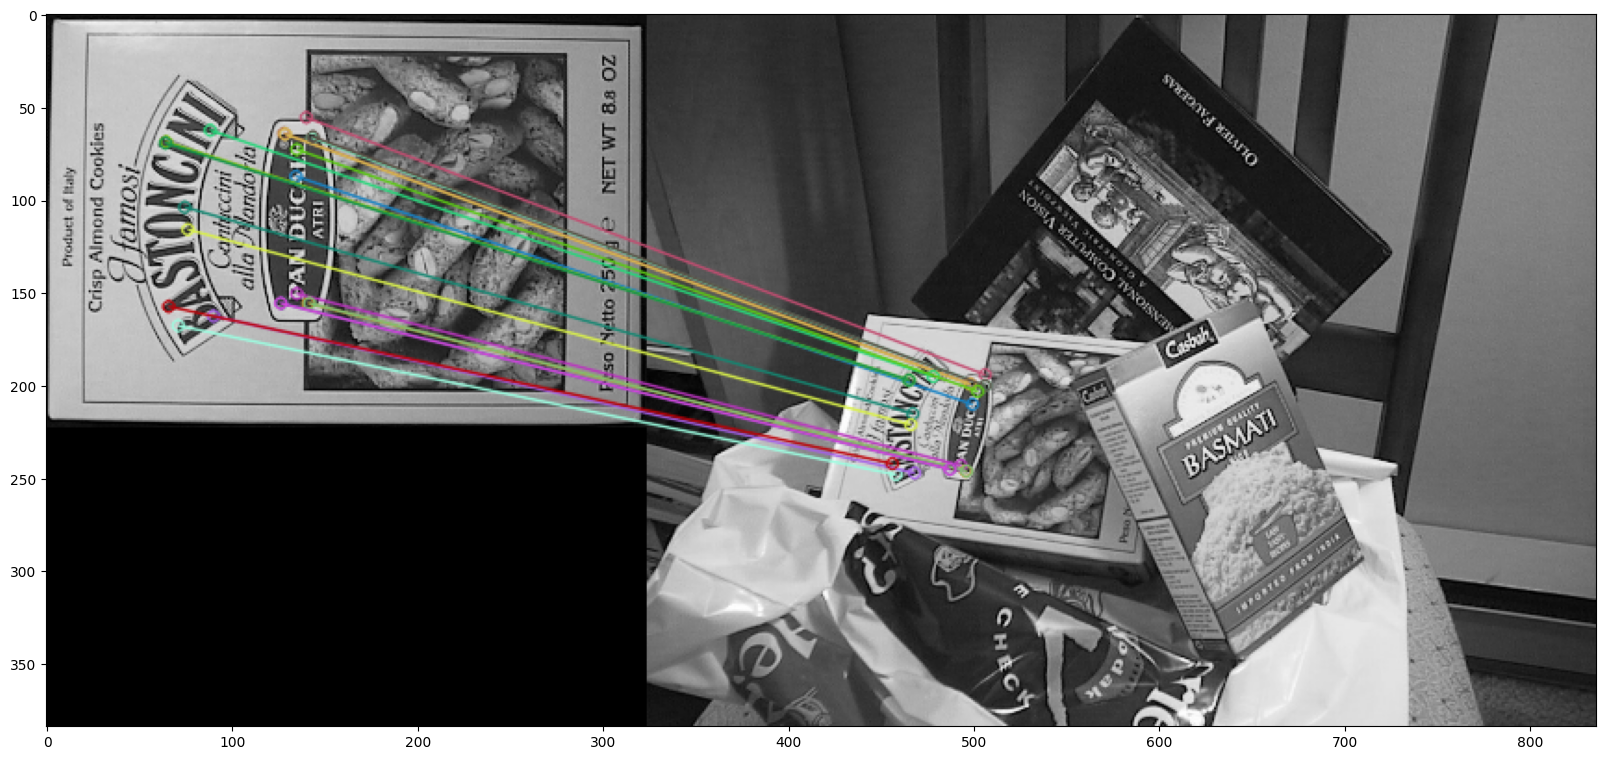


number of matching keypoints between the training and query images:  453


In [5]:
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png') 

# Initiate SIFT detector
sift = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = False)

# Match descriptors
matches = bf.match(des1,des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
img_result = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=[20,10])
plt.imshow(img_result[...,::-1]),plt.show()

print("\nnumber of matching keypoints between the training and query images: ", len(matches))